In [3]:
%pip install scikit-learn
%pip install matplotlib
%pip install xgboost 
%pip install seaborn 
%pip install lightgbm
%pip install tensorflow
%pip install keras
%pip install scikeras
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [135]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost 
import lightgbm 
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress INFO messages
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

**Date Exploration, Preparation and Pre-processing**

In [197]:
df = pd.read_csv("hotel_booking.csv")
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [141]:
print('Shape before deleting duplicate values:', df.shape)

df = df.drop_duplicates()

print('Shape after deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (119390, 36)
Shape after deleting duplicate values: (119390, 36)


In [143]:
# Goal attribute: is_canceled

df['is_canceled'].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [145]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [147]:
df.size

4298040

In [149]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [151]:
df.describe(include=['object'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461,48,6,1,28


In [153]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [155]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [199]:
df['agent_company'] = df['agent'].astype(str) + '_' + df['company'].astype(str)
df['agent_company'].fillna("no_agent_company", inplace=True)
df_cleaned = df.drop(columns=['agent', 'company'])

In [201]:
# Creating 'arrival_date' column from year, month, and day
df_cleaned['arrival_date'] = pd.to_datetime(df_cleaned['arrival_date_year'].astype(str) + '-' +
                                            df_cleaned['arrival_date_month'] + '-' +
                                            df_cleaned['arrival_date_day_of_month'].astype(str))

# Drop the original date columns
df_cleaned.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'], inplace=True)

In [203]:
# Creating 'total_nights' column by summing weekend and week nights
df_cleaned['total_nights'] = df_cleaned['stays_in_weekend_nights'] + df_cleaned['stays_in_week_nights']

# Drop the original stay columns
df_cleaned.drop(columns=['stays_in_weekend_nights', 'stays_in_week_nights'], inplace=True)

In [205]:
# Creating 'total_guests' column by summing adults, children, and babies
df_cleaned['total_guests'] = df_cleaned['adults'] + df_cleaned['children'] + df_cleaned['babies']

# Drop the original guest count columns
df_cleaned.drop(columns=['adults', 'children', 'babies'], inplace=True)

In [207]:
df_cleaned.columns

Index(['hotel', 'is_canceled', 'lead_time', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'deposit_type', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card', 'agent_company', 'arrival_date',
       'total_nights', 'total_guests'],
      dtype='object')

In [209]:
df_cleaned.head()

,hotel,is_canceled,lead_time,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,reservation_status,reservation_status_date,name,email,phone-number,credit_card,agent_company,arrival_date,total_nights,total_guests
0,Resort Hotel,0,342,BB,PRT,Direct,Direct,0,0,0,...,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,nan_nan,2015-07-01,0,2.0
1,Resort Hotel,0,737,BB,PRT,Direct,Direct,0,0,0,...,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,nan_nan,2015-07-01,0,2.0
2,Resort Hotel,0,7,BB,GBR,Direct,Direct,0,0,0,...,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,nan_nan,2015-07-01,1,1.0
3,Resort Hotel,0,13,BB,GBR,Corporate,Corporate,0,0,0,...,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,304.0_nan,2015-07-01,1,1.0
4,Resort Hotel,0,14,BB,GBR,Online TA,TA/TO,0,0,0,...,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,240.0_nan,2015-07-01,2,2.0


In [191]:
missing_values = df_cleaned.isnull().sum()

missing_values

hotel                               0
is_canceled                         0
lead_time                           0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_status                  0
reservation_status_date             0
name                                0
email                               0
phone-number                        0
credit_card                         0
agent_company                       0
arrival_date

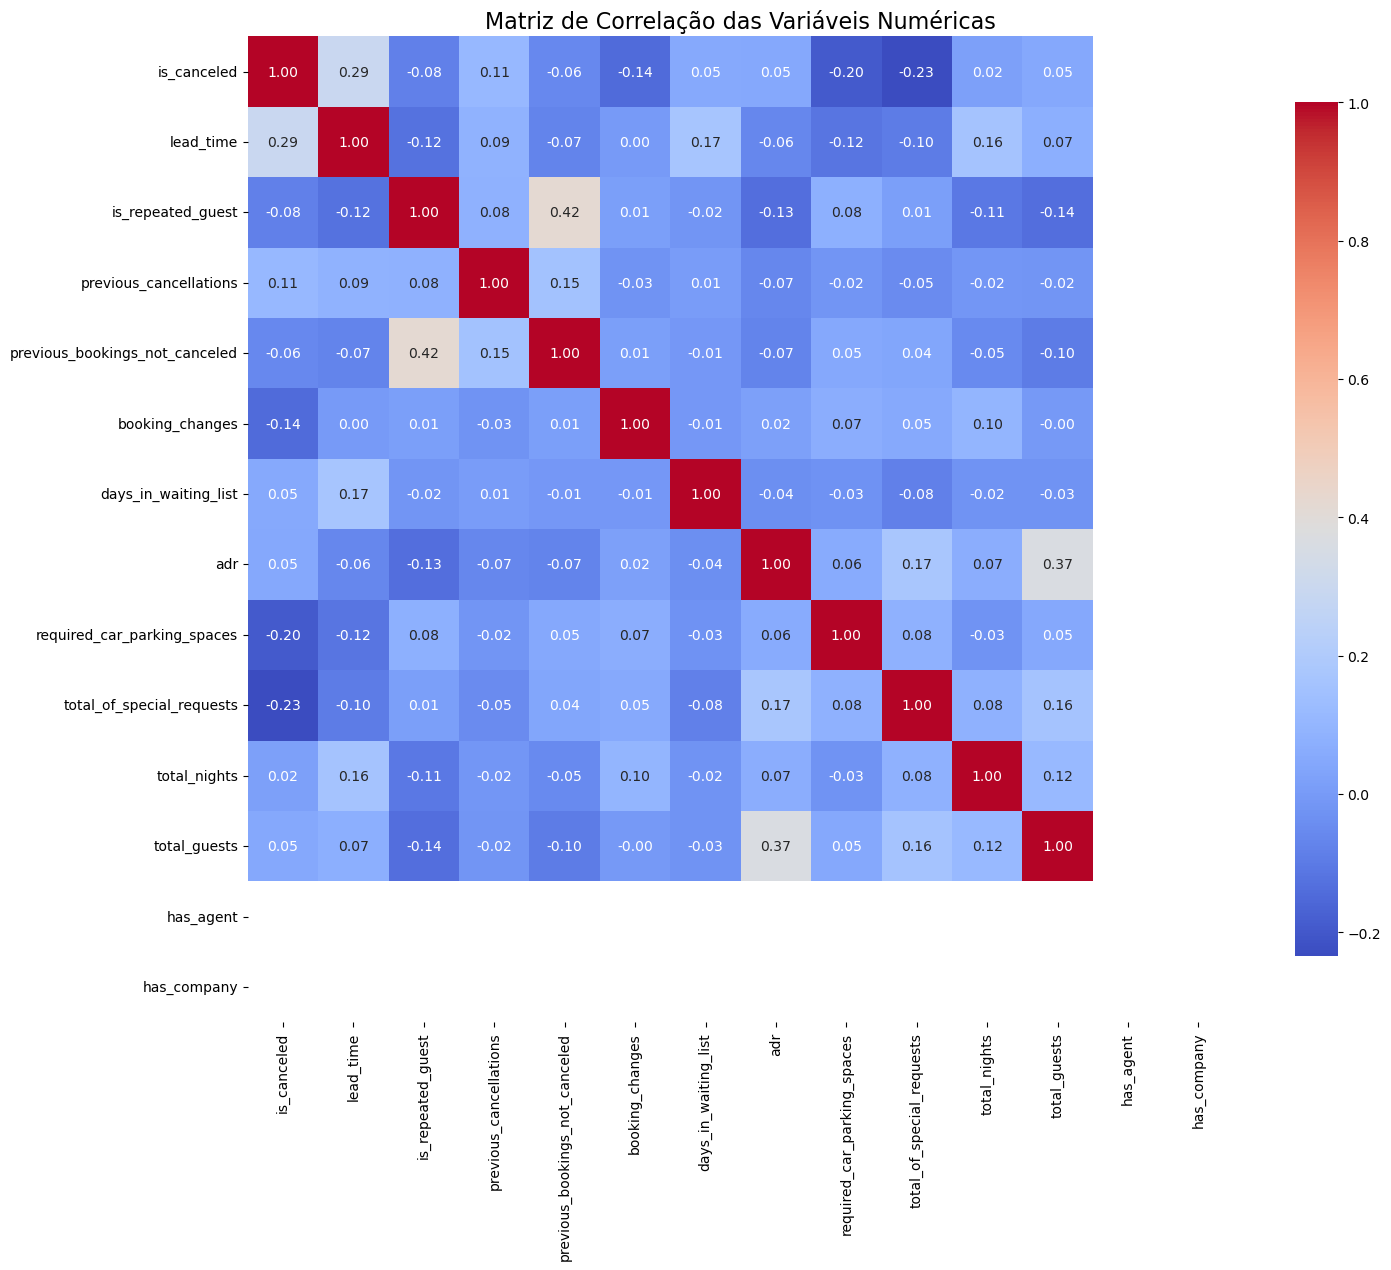

In [35]:
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64'])

correlation_matrix = num_cols.corr()

plt.figure(figsize=(15, 13))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})

plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [37]:
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)
df_encoded.head()

,is_canceled,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,...,reservation_status_date_2017-09-03,reservation_status_date_2017-09-04,reservation_status_date_2017-09-05,reservation_status_date_2017-09-06,reservation_status_date_2017-09-07,reservation_status_date_2017-09-08,reservation_status_date_2017-09-09,reservation_status_date_2017-09-10,reservation_status_date_2017-09-12,reservation_status_date_2017-09-14
0,0,342,0,0,0,3,0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,0,737,0,0,0,4,0,0.0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,7,0,0,0,0,0,75.0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,13,0,0,0,0,0,75.0,0,0,...,False,False,False,False,False,False,False,False,False,False
4,0,14,0,0,0,0,0,98.0,0,1,...,False,False,False,False,False,False,False,False,False,False


In [39]:
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded[numerical_cols].head()

,is_canceled,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_nights,total_guests,has_agent,has_company
0,0.0,0.464043,0.0,0.0,0.0,0.142857,0.0,0.001180,0.0,0.0,0.000000,0.036364,0.0,0.0
1,0.0,1.000000,0.0,0.0,0.0,0.190476,0.0,0.001180,0.0,0.0,0.000000,0.036364,0.0,0.0
2,0.0,0.009498,0.0,0.0,0.0,0.000000,0.0,0.015053,0.0,0.0,0.014493,0.018182,0.0,0.0
3,0.0,0.017639,0.0,0.0,0.0,0.000000,0.0,0.015053,0.0,0.0,0.014493,0.018182,0.0,0.0
4,0.0,0.018996,0.0,0.0,0.0,0.000000,0.0,0.019307,0.0,0.2,0.028986,0.036364,0.0,0.0


In [41]:
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)

outliers_iqr_count = outliers_iqr.sum()

outlier_summary = pd.DataFrame({
    'Coluna': outliers_iqr_count.index,
    'Número de Outliers': outliers_iqr_count.values
})

outlier_summary

,Coluna,Número de Outliers
0,is_canceled,0
1,lead_time,3005
2,arrival_date_year,0
3,arrival_date_week_number,0
4,arrival_date_day_of_month,0
5,stays_in_weekend_nights,265
6,stays_in_week_nights,3354
7,adults,29710
8,children,8590
9,babies,917


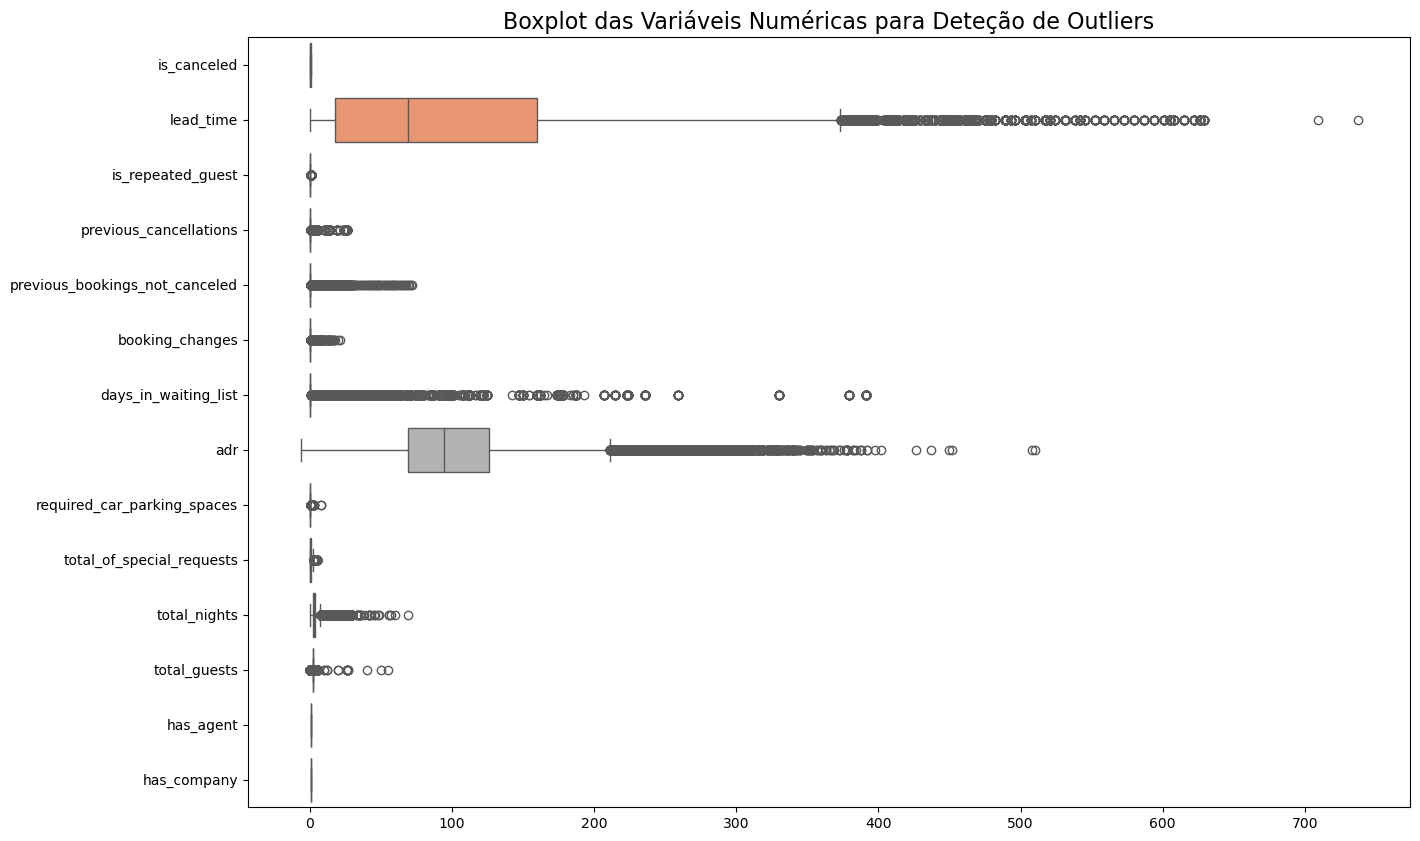

In [43]:
df_cleaned = df_cleaned[df_cleaned['adr'] <= 5000]

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_cleaned.select_dtypes(include=['float64', 'int64']), orient="h", palette="Set2")
plt.title('Boxplot das Variáveis Numéricas para Deteção de Outliers', fontsize=16)
plt.show()

Datetime columns:  Index(['arrival_date'], dtype='object')
Outliers - Regressão:
380
Outliers - Clusters:
82120


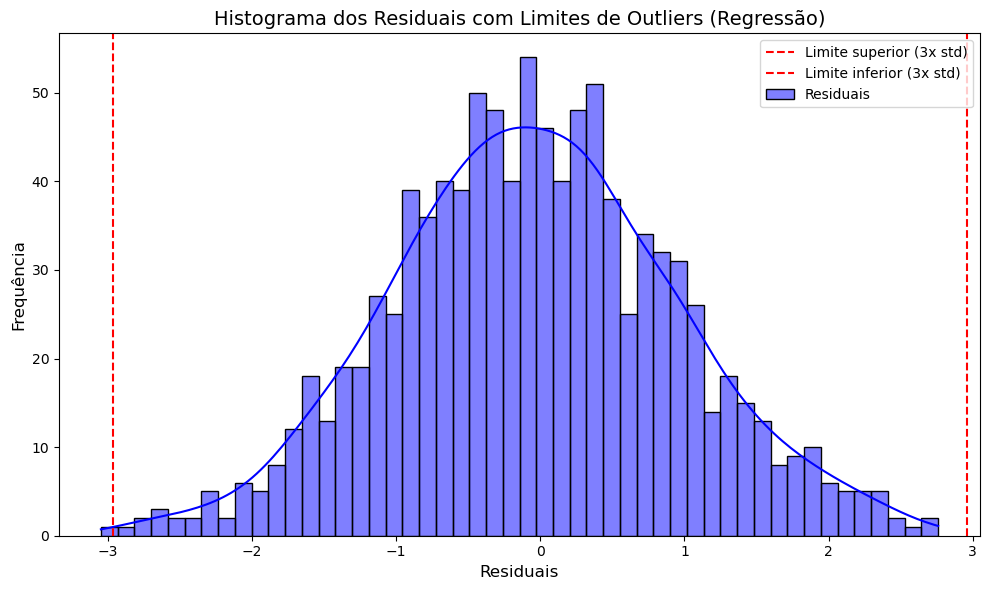

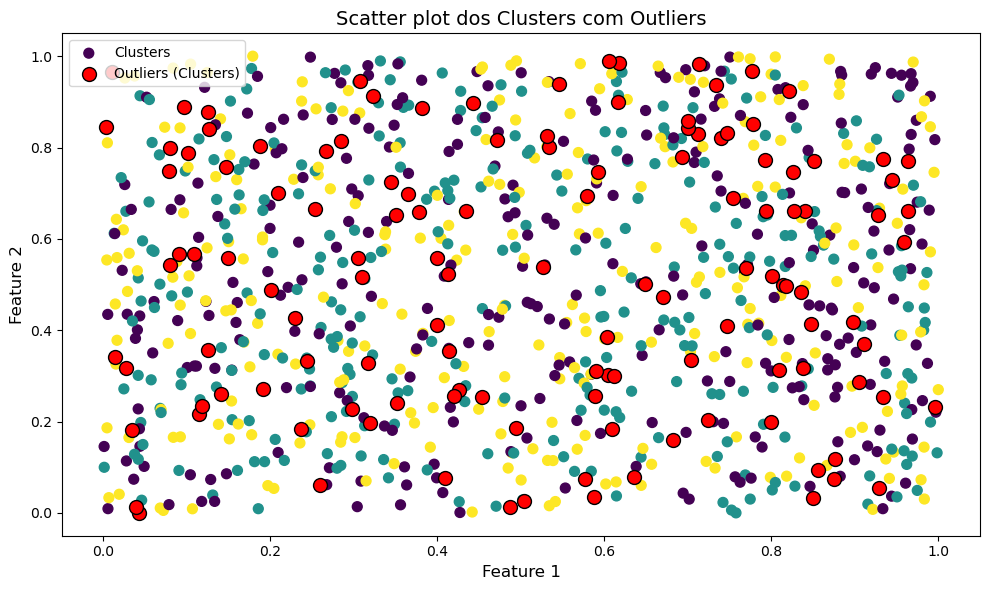

In [45]:
#is_canceled é target pq o objetivo é prever se a reserva vai ser cancelada
datetime_cols = df_encoded.select_dtypes(include=['datetime64']).columns
print("Datetime columns: ", datetime_cols)

for col in datetime_cols:
    df_encoded[col + '_year'] = df_encoded[col].dt.year
    df_encoded[col + '_month'] = df_encoded[col].dt.month
    df_encoded[col + '_day'] = df_encoded[col].dt.day

df_encoded = df_encoded.drop(columns=datetime_cols)

X = df_encoded.drop(columns=['is_canceled'])
y = df_encoded['is_canceled'] 

reg = LinearRegression()
reg.fit(X, y)

y_pred = reg.predict(X)

residuals = y - y_pred

residuals_outliers = np.abs(residuals) > (3 * np.std(residuals))

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

distances = kmeans.transform(X).min(axis=1)

cluster_outliers = distances > (3 * np.std(distances))

residuals_outliers_count = np.sum(residuals_outliers)
cluster_outliers_count = np.sum(cluster_outliers)

print("Outliers - Regressão:")
print(residuals_outliers_count)
print("Outliers - Clusters:")
print(cluster_outliers_count)

# Simulating the residuals and outliers for demonstration
np.random.seed(0)
residuals = np.random.normal(loc=0, scale=1, size=1000)
residuals_outliers = np.abs(residuals) > (3 * np.std(residuals))

# Simulating cluster data and outliers
X = np.random.rand(1000, 2)
kmeans_labels = np.random.choice([0, 1, 2], size=1000)
distances = np.random.rand(1000)
cluster_outliers = distances > (3 * np.std(distances))

# Gráfico 1: Histograma dos Residuais com Outliers
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, color='blue', label='Residuais', kde=True)
plt.axvline(3 * np.std(residuals), color='red', linestyle='--', label='Limite superior (3x std)')
plt.axvline(-3 * np.std(residuals), color='red', linestyle='--', label='Limite inferior (3x std)')
plt.title("Histograma dos Residuais com Limites de Outliers (Regressão)", fontsize=14)
plt.xlabel("Residuais", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico 2: Scatter Plot dos Clusters com Outliers
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', label='Clusters', s=50)
plt.scatter(X[cluster_outliers][:, 0], X[cluster_outliers][:, 1], color='red', label='Outliers (Clusters)', edgecolor='k', s=100)
plt.title("Scatter plot dos Clusters com Outliers", fontsize=14)
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()




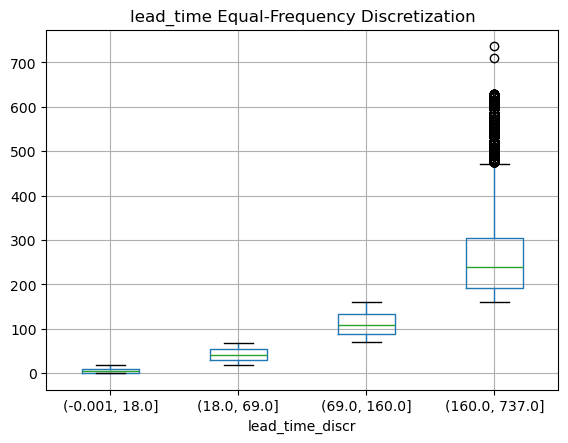

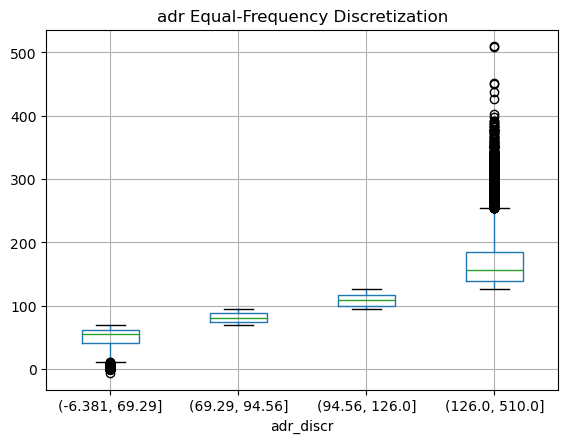

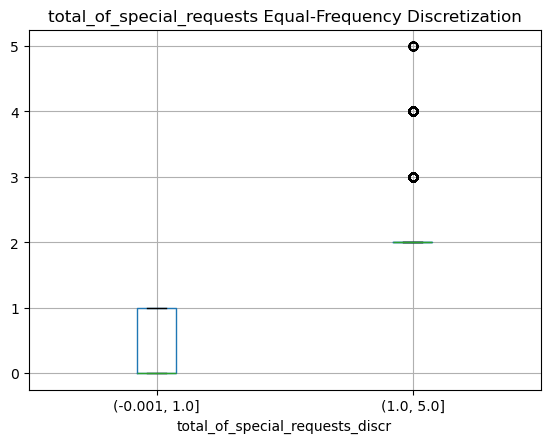

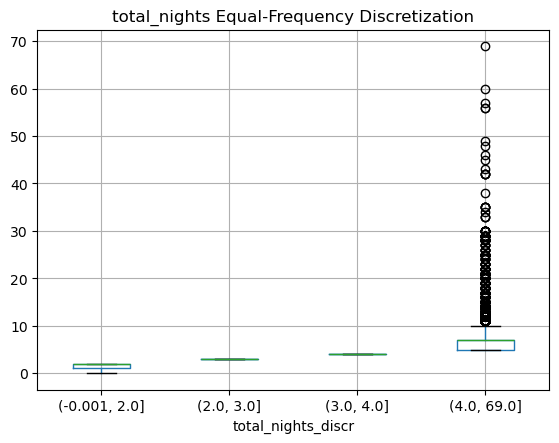

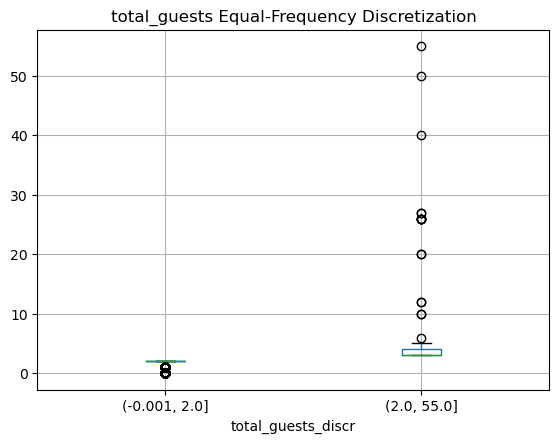

In [47]:
num_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    df_cleaned[col + '_discr'] = pd.qcut(df_cleaned[col], q=4, duplicates='drop')  # 4 equal-frequency bins

# Plot a boxplot for each discretized column if bins are valid
for col in num_columns:
    discr_column = col + '_discr'
    if discr_column in df_cleaned.columns and df_cleaned[discr_column].nunique() > 1:  # Check if bins exist
        try:
            df_cleaned.boxplot(column=col, by=discr_column)
            plt.title(f"{col} Equal-Frequency Discretization")
            plt.suptitle('')  # Removes the automatic subtitle
            plt.show()
        except ValueError as e:
            print(f"Could not plot {col} due to: {e}")

**Feature Selection**

1. Filter Methods

1.1 ANOVA

1.2 Chi-Square

2. Embedded Methods

2.1 LASSO Regularization

2.2 Random Forest Algorithm

2.3 PCA

**Models**

1. K-nearest Neighbours

2. Decision Tree

3. Neural Networks

4. Naive Bayes

5. Support Vector Machines

**Combinação de modelos**